In [0]:
!pip install kaggle


In [0]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
import json
token={"username":"ravinas18","key":"2df46c0288ed9a1ff7274b762564a54a"}
with open('/content/kaggle.json', 'w') as file:
  json.dump(token, file)

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets list

401 - Unauthorized


In [0]:
!kaggle datasets download -d snap/amazon-fine-food-reviews


401 - Unauthorized


In [0]:
!kaggle datasets download -d snap/amazon-fine-food-reviews



401 - Unauthorized


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
from zipfile import ZipFile
import pandas as pd
zip_file = ZipFile('/content/amazon-fine-food-reviews.zip')
fields= ['Id','Score'] 
data=pd.read_csv(zip_file.open('Reviews.csv'),usecols=fields)
data.tail(100)

FileNotFoundError: ignored

In [0]:
data.shape

In [0]:
from zipfile import ZipFile
zip_file = ZipFile('amazon-fine-food-reviews.zip') 
data=pd.read_csv(zip_file.open('Reviews.csv'))
data2=pd.DataFrame(data) 
data1 = data2[data2['Score'] != 3]
data1.loc[data1.Score >3, 'Class'] = 1
data1.loc[data1.Score <3, 'Class'] = 0
print(data2)  


FileNotFoundError: ignored

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os
count_class=pd.value_counts(data1["Class"]==0, sort=True)
count_class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('chart')
plt.show()
#

NameError: ignored

In [0]:
print(count_class)

True     443777
False     82037
Name: Class, dtype: int64


In [0]:
data1.shape

(525814, 11)

In [0]:
443777+82037

525814

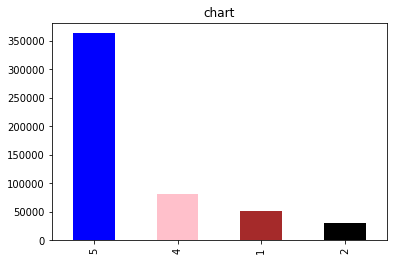

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os
count_class=pd.value_counts(data1["Score"], sort=True)
count_class.plot(kind= 'bar', color= ["blue", "pink", "brown", "black"])
plt.title('chart')
plt.show()
#

In [0]:
print(data2)

            Id  ...                                               Text
0            1  ...  I have bought several of the Vitality canned d...
1            2  ...  Product arrived labeled as Jumbo Salted Peanut...
2            3  ...  This is a confection that has been around a fe...
3            4  ...  If you are looking for the secret ingredient i...
4            5  ...  Great taffy at a great price.  There was a wid...
5            6  ...  I got a wild hair for taffy and ordered this f...
6            7  ...  This saltwater taffy had great flavors and was...
7            8  ...  This taffy is so good.  It is very soft and ch...
8            9  ...  Right now I'm mostly just sprouting this so my...
9           10  ...  This is a very healthy dog food. Good for thei...
10          11  ...  I don't know if it's the cactus or the tequila...
11          12  ...  One of my boys needed to lose some weight and ...
12          13  ...  My cats have been happily eating Felidae Plati...
13    

In [0]:
import pandas as pd
from zipfile import ZipFile
zip_file = ZipFile('/content/amazon-fine-food-reviews.zip') 
data=pd.read_csv(zip_file.open('Reviews.csv'))
data2=pd.DataFrame(data, columns= ['ProductId', 'UserId', 'ProfileName','Time', 'Text','Score'] ) 
data1 = data2[data2['Score'] != 3]
#data1.sort_values(by='ProductId', ascending=False)
data1.sort_values(by=['ProductId'], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
df1=data1[data1.duplicated(['UserId', 'Time', 'Text', 'ProfileName'])]
df1.shape

#df1.head(100)
data1.drop_duplicates(subset =['UserId', 'Time', 'Text', 'ProfileName'], keep = 'first', inplace = True) 
data1.loc[data1.Score <3, 'Score'] = 0
data1.loc[data1.Score >3, 'Score'] = 1
#print(data1)  
data1.shape
data1['Text'] = data1['Text'].str.replace('http\S+|www.\S+', '', case=False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [0]:
data1.sort_values(by=['ProductId'], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [0]:
from string import punctuation

In [0]:
from string import punctuation
import re
import string 
rem = string.punctuation
pattern = r"[{}]".format(rem)
data1['Text'] = data1['Text'].str.replace(pattern, '')
#print(data1['Text'])
data1['Text']=data1['Text'].str.lower()
#data3=data1.str.lower()
#print(data1)
data1.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ProductId,UserId,ProfileName,Time,Text,Score
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1303862400,i have bought several of the vitality canned d...,1
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1346976000,product arrived labeled as jumbo salted peanut...,0
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1219017600,this is a confection that has been around a fe...,1
3,B000UA0QIQ,A395BORC6FGVXV,Karl,1307923200,if you are looking for the secret ingredient i...,0
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",1350777600,great taffy at a great price there was a wide...,1
5,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,1342051200,i got a wild hair for taffy and ordered this f...,1
6,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,1340150400,this saltwater taffy had great flavors and was...,1
7,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,1336003200,this taffy is so good it is very soft and che...,1
8,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1322006400,right now im mostly just sprouting this so my ...,1
9,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,1351209600,this is a very healthy dog food good for their...,1


In [0]:
#rem = string.punctuation
#pattern = r"[{}]".format(rem)
#pattern
length=len(data1)
length

364173

In [0]:
from bs4 import BeautifulSoup
for i in range (0, length):
  data1['Text'].values[i] = re.sub(r"http\S+", "", data1['Text'].values[i])
  data1['Text'].values[i] = BeautifulSoup(data1['Text'].values[i], 'lxml').get_text()
  
data1.head(10)

,ProductId,UserId,ProfileName,Time,Text,Score
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1303862400,i have bought several of the vitality canned d...,1
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1346976000,product arrived labeled as jumbo salted peanut...,0
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1219017600,this is a confection that has been around a fe...,1
3,B000UA0QIQ,A395BORC6FGVXV,Karl,1307923200,if you are looking for the secret ingredient i...,0
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",1350777600,great taffy at a great price there was a wide...,1
5,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,1342051200,i got a wild hair for taffy and ordered this f...,1
6,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,1340150400,this saltwater taffy had great flavors and was...,1
7,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,1336003200,this taffy is so good it is very soft and che...,1
8,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1322006400,right now im mostly just sprouting this so my ...,1
9,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,1351209600,this is a very healthy dog food good for their...,1


In [0]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [0]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:

# Combining all the above stundents 
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(data1['Text'].values):
    #sentance = re.sub(r"http\S+", "", sentance)
    #sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████| 364173/364173 [00:38<00:00, 9341.14it/s]


In [0]:
data1['cleaned']=preprocessed_reviews

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
#data1.head(10)
data1['cleaned'].shape

(364173,)

In [0]:
pip install pytablewriter

In [0]:

import re
import math
import sqlite3
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#import pytablewriter

from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

# modules for text processing
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

#import scikitplot.metrics as skplt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
#import pytablewriter
import pytablewriter 



# knn modules
# train-split data,accuracy-score,cross-validation modules

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from collections import Counter
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

In [0]:
Pre_Process_Data = data1[['cleaned','Score','Time']]
X_Text=Pre_Process_Data ['cleaned']

Y_Score =Pre_Process_Data ['Score'] # positive or negative score
print('\nPre_Process_Text_Data  X_Text=',X_Text.shape)
print('\nPre_Process_Score_Data Y_Score=',Y_Score.shape)




Pre_Process_Text_Data  X_Text= (364173,)

Pre_Process_Score_Data Y_Score= (364173,)


In [0]:
pos_final = Pre_Process_Data[Pre_Process_Data .Score == 1]
print(pos_final.Score.value_counts())

1    307063
Name: Score, dtype: int64


In [0]:
neg_final = Pre_Process_Data [Pre_Process_Data .Score == 0] # negative reviews
print(neg_final.Score.value_counts())

0    57110
Name: Score, dtype: int64


In [0]:
final_pos_neg = pd.concat([pos_final,neg_final],axis=0)
print(len(final_pos_neg))
print(type(final_pos_neg))

364173
<class 'pandas.core.frame.DataFrame'>


In [0]:
print(final_pos_neg.columns)

Index(['cleaned', 'Score', 'Time'], dtype='object')


In [0]:
# splitting training and testing dataset (Time based splitting)

#final_pos_neg= final_pos_neg.sample(frac=0.07,random_state=1)
X1 = final_pos_neg[['cleaned','Time']].sort_values('Time',axis=0).drop('Time',axis=1)
#50k data sample
X=X1[:40000]
print(X.shape)
Y1 = final_pos_neg[['Score','Time']].sort_values('Time',axis=0).drop('Time',axis=1)
#50k data sample
Y=Y1[:40000]
Y = Y['Score'].map(lambda x: 1 if x == 1 else 0).values
print(Y.shape)
## 70 % of data
tt =math.ceil(len(X)*.7)
print(tt)

X_train_data =  X[:tt] 
X_train_data  = X_train_data
print('X_train_data ',X_train_data.shape)
X_test_data = X[tt:]
X_test_data = X_test_data
print('X_test_data ',X_test_data.shape )
Y_train_data = Y[:tt]
Y_train_data  = Y_train_data
print('Y_train_data ',Y_train_data.shape )
Y_test_data = Y[tt:]
Y_test_data= Y_test_data
print('Y_test_data ',Y_test_data .shape)

(40000, 1)
(40000,)
28000
X_train_data  (28000, 1)
X_test_data  (12000, 1)
Y_train_data  (28000,)
Y_test_data  (12000,)


In [0]:
models_performence = {
    'Model':[],
    'Vectorizer': [],
    'SearchCV':[],
    'Scoring Metrics': [],
    'Train_model_score': [],
    'Test_model_score': [],
    'best panalty': [],
    'Best lambda':[],
}

columns = ["Model","Vectorizer","SearchCV", "Scoring Metrics","Train_model_score","Test_model_score", "best panalty","Best lambda"]
print(len(columns))
pd.DataFrame(models_performence, columns=columns)

8


,Model,Vectorizer,SearchCV,Scoring Metrics,Train_model_score,Test_model_score,best panalty,Best lambda


In [0]:

# Time seris splitting Cross-Validation
tscv = TimeSeriesSplit(n_splits=10)

In [0]:
#  lambda_LR is function to calculate the lambda value using'L2' for Logistic Regression
def lambda_LR1(X_train,y_train,X_test, y_test,vectorization):
    #  regularization penalty space
    penalty = ['l2']
    #  regularization hyperparameter distribution using uniform distribution
    C1 = uniform(loc=0, scale=4)
    C = np.logspace(0, 4, 10)
    #  hyperparameter options
    hp1 =dict(C=C, penalty=penalty)
    hp = dict(C=C1, penalty=penalty)
    # Scoring options
    d = ['accuracy','precision','recall','f1'] 
    
    for i in range(len(d)):
        models_performence['Model'].append('Logistic Regression')
        models_performence['Vectorizer'].append(vectorization)
        models_performence['SearchCV'].append('GridSearchCV')
        #print('for GridSearchCV') 
        p = d[i]
        models_performence['Scoring Metrics'].append(p)
        model1 = GridSearchCV(LogisticRegression(), hp1, scoring = p, cv=tscv,n_jobs= -1)
        best_model1=model1.fit(X_train, y_train)
        
        Test_model_score=model1.score(X_test, y_test)
        Train_model_score=model1.score(X_train, y_train)
        models_performence['Train_model_score'].append(Train_model_score.mean())
        models_performence['Test_model_score'].append(Test_model_score.mean())
        
        #Reg1=best_model1.best_estimator_.get_params()['penalty']
       
        models_performence['best panalty'].append('l2')
        optimal_l1=best_model1.best_estimator_.get_params()['C']
        
        models_performence['Best lambda'].append(optimal_l1)
        
        
        
        #print('For RandomsearchCV')
        models_performence['Model'].append('Logistic Regression')
        models_performence['Vectorizer'].append(vectorization)
        
        models_performence['SearchCV'].append('RandomsearchCV')
        
        model2 = RandomizedSearchCV(LogisticRegression(),hp,scoring = p, cv=tscv,n_jobs= -1)
        # Fit randomized search
        best_model2 = model2.fit(X_train,y_train)
        
        models_performence['Scoring Metrics'].append(p)
        #print(model2.best_estimator_)
        Test_model_score2=model2.score(X_test, y_test)
        Train_model_score=model2.score(X_train, y_train)
        models_performence['Train_model_score'].append(Train_model_score.mean())
       
        models_performence['Test_model_score'].append(Test_model_score2.mean())
        #Reg2=best_model2.best_estimator_.get_params()['penalty']
        
        models_performence['best panalty'].append('l2')
        optimal_l2=best_model2.best_estimator_.get_params()['C']
       
        
        models_performence['Best lambda'].append(optimal_l2)

In [0]:
# result_display  is function to convert dataframe into table format in Markdown
def result_display(df):
    writer = pytablewriter.MarkdownTableWriter()
    #writer.table_name = name
    writer.header_list = list(df.columns.values)
    writer.value_matrix = df.values.tolist()
    writer.write_table()

In [0]:
count_vect = CountVectorizer() #in scikit-learn
#vector of train data
data = count_vect.fit_transform(X_train_data.values.astype('U').ravel())
data.get_shape()

final_data = StandardScaler(with_mean=False).fit_transform(data )
print(final_data.shape)

(28000, 44503)


In [0]:
final_data1=count_vect.transform(X_test_data.values.ravel())
#print(final_data1)
final_data_test = StandardScaler(with_mean=False).fit_transform(final_data1)
print(final_data_test.shape)

(12000, 44503)


In [0]:
Train_data=Y_train_data

print(Train_data.shape)

(28000,)


In [0]:

vectorization='BOW'
optimal_lambda = lambda_LR1(final_data ,Train_data,final_data_test,Y_test_data,vectorization )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
df2=pd.DataFrame(models_performence, columns=columns)
result_display(df2)

|       Model       |Vectorizer|   SearchCV   |Scoring Metrics|Train_model_score|Test_model_score|best panalty|Best lambda|
|-------------------|----------|--------------|---------------|----------------:|---------------:|------------|----------:|
|Logistic Regression|BOW       |GridSearchCV  |accuracy       |                1|          0.9068|l2          |      1.000|
|Logistic Regression|BOW       |RandomsearchCV|accuracy       |                1|          0.9097|l2          |      0.423|
|Logistic Regression|BOW       |GridSearchCV  |precision      |                1|          0.9446|l2          |  10000.000|
|Logistic Regression|BOW       |RandomsearchCV|precision      |                1|          0.9404|l2          |      3.646|
|Logistic Regression|BOW       |GridSearchCV  |recall         |                1|          0.9564|l2          |      1.000|
|Logistic Regression|BOW       |RandomsearchCV|recall         |                1|          0.9598|l2          |      0.437|
|Logisti

In [0]:
df2=pd.DataFrame(models_performence, columns=columns)
zx=df2[df2['best panalty'] == 'l2']
zx=zx[zx['SearchCV']=='GridSearchCV']
zx= zx.ix[zx['Test_model_score'].idxmax()]
print(zx)
lambdax=zx['Best lambda']

best_panalty=zx['best panalty']

Scoring_Metrics =zx['Scoring Metrics']
SearchCV=zx['SearchCV']
#print(SearchCV)

Model                Logistic Regression
Vectorizer                           BOW
SearchCV                    GridSearchCV
Scoring Metrics                   recall
Train_model_score                      1
Test_model_score                0.956379
best panalty                          l2
Best lambda                            1
Name: 4, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [0]:
#Best lambda and best penalty
hp1=dict(C=[lambdax], penalty=[best_panalty])
LR =GridSearchCV(LogisticRegression(), hp1, scoring =Scoring_Metrics, cv=tscv)
LR.fit(final_data ,Train_data)

prediction1 = LR.predict(final_data_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
#Training accuracy and training error
training_score=LR.score(final_data,Train_data)
print('training accuracy=',training_score)
training_error=1-training_score
print('training error is =',training_error)

training accuracy= 1.0
training error is = 0.0


In [0]:
Testing_score=round(accuracy_score(Y_test_data ,prediction1),5)
print("Accuracy for Logistic Regression model with Bag of words is = ",Testing_score)
Testing_error=1-Testing_score
print("Testing error for Logistic Regression model with Bag of words is = ",Testing_error)

Accuracy for Logistic Regression model with Bag of words is =  0.90683
Testing error for Logistic Regression model with Bag of words is =  0.09316999999999998


In [0]:
F1_score = round(f1_score(Y_test_data ,prediction1,average='macro'),5)*100
recall = round(recall_score(Y_test_data,prediction1,average='macro'),5)*100
precision = round(precision_score(Y_test_data ,prediction1,average='macro'),5)*100

In [0]:
print(classification_report( Y_test_data,prediction1))

              precision    recall  f1-score   support

           0       0.60      0.51      0.55      1340
           1       0.94      0.96      0.95     10660

    accuracy                           0.91     12000
   macro avg       0.77      0.73      0.75     12000
weighted avg       0.90      0.91      0.90     12000



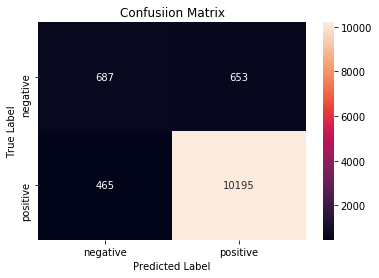

In [0]:
cm = confusion_matrix(Y_test_data ,prediction1)
label = ['negative', 'positive']
df_conf = pd.DataFrame(cm, index = label, columns = label)
sns.heatmap(df_conf, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
models_performence1 = {
    'Model':['Logistic Regression'],   
    'Vectorizer': ['BoW'],
    'SearchCV':[SearchCV],
    'Best penalty':[best_panalty],
    'Optimal lambda': [lambdax],
    'Training error':[training_error*100],
    'Test error':[Testing_error*100],
    'Accuracy':[Testing_score],
    'F1':[F1_score],
    'recall':[recall],
    'precision':[precision]
    
  
}

In [0]:
columns = ["Model","Vectorizer","SearchCV", "Best penalty","Optimal lambda", "Training error",  "Test error",
            "Accuracy","F1","recall","precision",
          ]
df1=pd.DataFrame(models_performence1, columns=columns)

In [0]:
result_display(df1)

|       Model       |Vectorizer|  SearchCV  |Best penalty|Optimal lambda|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------------|----------|------------|------------|-------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Logistic Regression|BoW       |GridSearchCV|l2          |             1|             0|     9.317|  0.9068|74.97| 73.45|    76.81|


In [0]:
model = LogisticRegression( random_state=0, class_weight='balanced')
model.fit(final_data ,Train_data)
# Calculate feature importances
count_vect_feature=count_vect.get_feature_names()
feature_importance = model.coef_[0]
print(feature_importance)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[ 2.09392282e-03  3.54700187e-03 -2.81583499e-07 ... -4.76084750e-05
  1.82560270e-02  1.95146859e-02]


In [0]:
Negative_Feature_Importance= feature_importance[-15:]
print('Negative_Feature_Importanc',Negative_Feature_Importance)
Positive_Feature_Importance= feature_importance[:15]
print('Positive_Feature_Importance',Positive_Feature_Importance)

Negative_Feature_Importanc [ 5.93179852e-03 -1.26689461e-07 -3.65402371e-07 -2.02858738e-07
  8.32579172e-03  1.35248519e-02  5.82073358e-03  3.75673932e-05
 -5.36690638e-06 -1.58865233e-03 -2.17679597e-07 -2.17679597e-07
 -4.76084750e-05  1.82560270e-02  1.95146859e-02]
Positive_Feature_Importance [ 2.09392282e-03  3.54700187e-03 -2.81583499e-07  1.81955080e-03
  2.63907730e-06 -1.41571918e-07 -1.08111271e-02 -9.81201131e-07
 -1.68758147e-02  8.63192122e-03  9.15265535e-03  2.58284754e-02
  3.84365558e-04  1.19188158e-01  2.12131679e-02]


Top 15 negative class feature name           -0.498639
small          -0.512390
bland          -0.516265
horrible       -0.533773
cooked         -0.541696
probably       -0.554894
disappointed   -0.559416
hard           -0.565559
stale          -0.570635
awful          -0.579360
waste          -0.631236
dont           -0.653954
worst          -0.753441
didnt          -0.764572
not            -1.412387
dtype: float64


Text(0, 0.5, 'Relative Feature Importance for Negative class ')

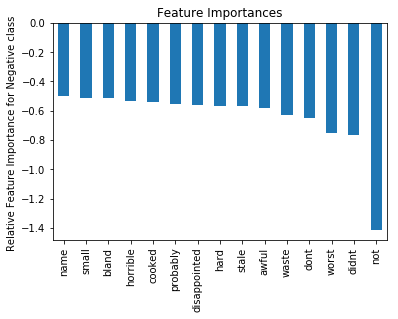

In [0]:
# Relative Feature Importance for Negative class using BOW
feat_imp = pd.Series(feature_importance, count_vect_feature).sort_values(ascending=False)
print("Top 15 negative class feature",feat_imp[-15:])

feat_imp[-15:].plot(kind='bar', title='Feature Importances')
plt.ylabel('Relative Feature Importance for Negative class ')

Top 15 postive class feature great        1.751471
love         1.389242
best         1.122824
good         0.963485
excellent    0.836147
find         0.776287
tasty        0.772711
really       0.720871
favorite     0.637386
fast         0.548639
delicious    0.547195
loves        0.542438
well         0.538555
highly       0.533606
smooth       0.530280
dtype: float64


Text(0, 0.5, 'Relative Feature Importance for Postive class ')

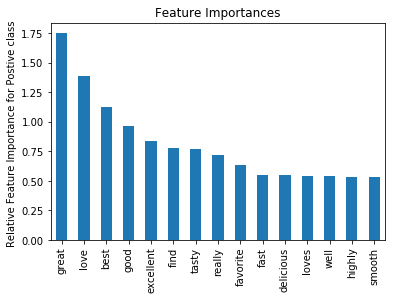

In [0]:
#Feature Importances for postive class using count_vect

feat_imp = pd.Series(feature_importance, count_vect_feature).sort_values(ascending=False)
print("Top 15 postive class feature",feat_imp[:15])

feat_imp[:15].plot(kind='bar', title='Feature Importances')
plt.ylabel('Relative Feature Importance for Postive class ')